In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np

In [2]:
electric = pd.read_csv('~/Downloads/Full+Eletric+Interval+042016.csv')

In [3]:
electric['Datetime'] = pd.to_datetime(electric['Date'] + ' ' + electric['Start Time'])

In [4]:
propertyCode = pd.read_excel('~/Downloads/SIMS_Property_List_4-6-2016_Revised.xlsx')

In [5]:
weather = pd.read_csv('~/Downloads/weather_prepared_final.csv')
weather.DATE = pd.to_datetime(weather.DATE)

### Codes

In [6]:
codes = pd.Series([b[0] for b in electric['Meter'].str.split()])
unicodes = codes.unique()
unicodes = pd.Series(unicodes)

### Area

In [7]:
arealst = []
for b in unicodes:
    arealst.append(propertyCode[propertyCode['Property Code'].isin([b])]['FCIM Gross Area'])
area = pd.DataFrame(arealst).sum(axis=1)
area = area.reset_index(drop=True)

### Ages

In [8]:
agelst = []

for i in unicodes:
    agelst.append(propertyCode[propertyCode['Property Code'].isin([i])]['Year Constructed'])
age = pd.DataFrame(agelst).sum(axis=1)
age = age.reset_index(drop=True)

### Cumulative Usage

In [20]:
clst = []
for i in unicodes:
    #for each unique code, find its Usage value in master df and add them all together, then append to list
    clst.append(electric.Usage[codes.isin([i])].sum())

In [22]:
clst= [i/731 for i in clst]

In [23]:
clst

[4110.942464566742,
 6328.0693378932865,
 2350.655458276321,
 3728.631463748022,
 10230.18050477648,
 4134.736612859096,
 16024.301433657422,
 1990.3016634746732,
 26911.06771601473,
 2202.190670314656,
 13260.329628180807,
 5793.04369630576,
 2687.724297948337,
 530.8636062926921,
 292.475274965798,
 295.35691887841205,
 2251.875398085115,
 2087.3281149111053,
 2291.865636116048,
 998.082860465121,
 358.7209756497733,
 3333.7737209301904,
 13719.64036963069,
 2367.291008208189,
 529.7355184678801,
 24503.58857886521,
 7693.112339261251,
 17949.484360070088,
 1875.5605034199766,
 2285.051047879719,
 3907.6984612895417,
 0.0,
 428.9853595075259,
 187.28978331052986,
 122.87832257177885,
 14653.651458288654,
 1548.4612875513258,
 85.48587400820517,
 218.97354582765564,
 4669.128812585449,
 645.7453731873917,
 1478.8767168262698,
 11776.058951591316,
 3244.683279890418,
 9462.487551299686,
 672.772924760605,
 74.8269854992582,
 371.80125061502105,
 15344.37169166493,
 6672.636689466514,
 

### Full building names

In [24]:
namelst = []
for i in unicodes:
    namelst.append(propertyCode[propertyCode['Property Code'].isin([i])]['Property Name'])
namelst
name = pd.DataFrame(namelst)
name = name.replace(np.nan, '', regex=True)
name = name.reset_index(drop=True)
name =name.sum(axis=1)

### Normalized usage

In [25]:
nusage = clst/area

In [27]:
data = {'Code': unicodes,'Building': name, 'Usage': clst, 'Area': area, 'Year': age, 'Normalized Usage': nusage}

In [28]:
cdf = pd.DataFrame(data)
cdf['Building'] = cdf['Code'] + " " + cdf['Building']

In [29]:
ccodes = []
for i in cdf['Code']:
    ccodes.append(i)
ccodes = pd.Series(ccodes)

### Functions

In [35]:
def concat_data(path1, path2, name):
    df = pd.read_csv('~/Downloads/Cornell Library Data/'+path1)
    df2 = pd.read_csv('~/Downloads/Cornell Library Data/'+path2)
    df['Datetime'] = df['Unnamed: 0']
    df2['Datetime'] = df2['Unnamed: 0']
    df['Usage'] = df[df.columns[1]]
    df2['Usage'] = df2[df2.columns[1]]
    df['Building'] = name
    df2['Building'] = name
    data = {'Building': df['Building'], 'Usage': df['Usage'], 'Datetime': df['Datetime']} 
    data2 = {'Building': df2['Building'], 'Usage': df2['Usage'], 'Datetime': df2['Datetime']}
    _df = pd.DataFrame(data)
    _df2 = pd.DataFrame(data2)
    _df['Datetime'] = pd.to_datetime(_df['Datetime'])
    _df2['Datetime'] = pd.to_datetime(_df2['Datetime'])
    _df = _df.replace({'nodata': 0}, regex=True)
    _df2 = _df2.replace({'nodata':0}, regex=True)
    combined = pd.concat([_df, _df2])
    combined = combined.reset_index(drop=True)
    combined['Usage'] = pd.to_numeric(combined['Usage'])
    return combined

In [36]:
def graphGroup(name):
    namepc = propertyCode[propertyCode['Building Use'].str.contains(name, na=False)]
    dflst = []
    for i in namepc['Property Code']:
        dflst.append(i)
    df = cdf[ccodes.isin(dflst)]
    df = df.reset_index(drop=True)
    df = df[df != 0]
    df.loc[-1] = [df['Area'].sum()/(len(df['Area'])), "avg", "Average", df['Normalized Usage'].sum()/(len(df['Normalized Usage'])), df['Usage'].sum()/(len(df['Usage'])), df['Year'].sum()/(len(df['Year']))] 
    return df

In [37]:
def cumulative_group_data(name):
    namepc = propertyCode[propertyCode['Building Use'].str.contains(name, na=False)]
    dflst = []
    for i in namepc['Property Code']:
        dflst.append(i)
    df = cdf[ccodes.isin(dflst)]
    df = df.reset_index(drop=True)
    df = df[df != 0]
    df.loc[-1] = [df['Area'].sum()/(len(df['Area'])), "avg", "Average", df['Normalized Usage'].sum()/(len(df['Normalized Usage'])), df['Usage'].sum()/(len(df['Usage'])), df['Year'].sum()/(len(df['Year']))] 
    return df

In [38]:
def get_building_data(name):
    namepc = propertyCode[propertyCode['Property Code'].str.contains(name, na=False)]
    dflst = []
    for i in namepc['Property Code']:
        dflst.append(i)
    df = electric[codes.isin(dflst)]
    df = df.reset_index(drop=True)
    df = df[df != 0]
    return df

In [101]:
libdf = cumulative_group_data('Library')
libdf

,Area,Building,Code,Normalized Usage,Usage,Year
0,168656.27,A06 John Crerar Library,A06,0.024375,4110.942465,1984.000000
1,64028.21,C25 Joe and Rika Mansueto Library,C25,0.050376,3225.510739,2011.000000
2,604949.48,C03 Regenstein Library,C03,0.043813,26504.579981,1970.000000
-1,279211.32,avg,Average,0.039521,11280.344395,1988.333333


In [49]:
olin = concat_data('Olin Library (14-15).csv', 'Olin Library (15-16).csv', 'Olin Library')
mann = concat_data('Mann Library (14-15).csv', 'Mann Library (15-16).csv', 'Mann Library')
kroch = concat_data('Kroch Library (14-15).csv', 'Kroch Library (15-16).csv', 'Kroch Library')

In [66]:
olin = olin[olin['Usage'] >= 0]
olin

,Building,Datetime,Usage
0,Olin Library,2014-01-01,3.407381
1,Olin Library,2014-01-02,9.677904
2,Olin Library,2014-01-03,8.069626
3,Olin Library,2014-01-04,9.949354
4,Olin Library,2014-01-05,11.004993
5,Olin Library,2014-01-06,10.952909
6,Olin Library,2014-01-07,9.578017
7,Olin Library,2014-01-08,9.884162
8,Olin Library,2014-01-09,11.501841
9,Olin Library,2014-01-10,11.457072


In [67]:
mann = mann[mann['Usage'] >= 0]
mann

,Building,Datetime,Usage
0,Mann Library,2014-01-01,44.543762
1,Mann Library,2014-01-02,45.866035
2,Mann Library,2014-01-03,41.842064
3,Mann Library,2014-01-04,29.905405
4,Mann Library,2014-01-05,57.471416
5,Mann Library,2014-01-06,64.230736
6,Mann Library,2014-01-07,74.626678
7,Mann Library,2014-01-08,113.485817
8,Mann Library,2014-01-09,114.237877
9,Mann Library,2014-01-10,108.381187


In [64]:
kroch = kroch[kroch['Usage'] >= 0]
kroch

,Building,Datetime,Usage
0,Kroch Library,2014-01-01,16.770691
1,Kroch Library,2014-01-02,17.324516
2,Kroch Library,2014-01-03,15.509018
3,Kroch Library,2014-01-04,16.813728
4,Kroch Library,2014-01-05,25.296955
5,Kroch Library,2014-01-06,28.606844
6,Kroch Library,2014-01-07,15.636385
7,Kroch Library,2014-01-08,17.629362
8,Kroch Library,2014-01-09,19.048288
9,Kroch Library,2014-01-10,32.440365


In [68]:
cliblst = []
def cumulative(df):
    csum = df['Usage'].sum()
    cliblst.append(csum)

In [69]:
cumulative(olin)
cumulative(mann)
cumulative(kroch)

In [71]:
cliblst  

[33461.2460637141, 56181.82298092941, 30211.052825929353]

In [72]:
namelst = ['Mann Library', 'Olin Library', 'Kroch Library']

In [73]:
arealst = [136817, 240026, 99541]

In [81]:
libdata = {'Building': namelst, 'Usage': cliblst, 'Area': arealst}

In [82]:
cornell_libdf = pd.DataFrame(libdata)

In [83]:
cornell_libdf['Normalized Usage'] = cornell_libdf['Usage']/cornell_libdf['Area']

In [84]:
cornell_libdf

,Area,Building,Usage,Normalized Usage
0,136817,Mann Library,33461.246064,0.244569
1,240026,Olin Library,56181.822981,0.234066
2,99541,Kroch Library,30211.052826,0.303504


In [102]:
combined= pd.concat([libdf, cornell_libdf])
combined = combined.reset_index(drop=True)

In [104]:
combined['Group'] = None
combined['Group'][0:4] =1
combined['Group'][4:] = 2

/Users/abisolaolawale/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/abisolaolawale/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
combined

,Area,Building,Code,Normalized Usage,Usage,Year,Group
0,168656.27,A06 John Crerar Library,A06,0.024375,4110.942465,1984.000000,1
1,64028.21,C25 Joe and Rika Mansueto Library,C25,0.050376,3225.510739,2011.000000,1
2,604949.48,C03 Regenstein Library,C03,0.043813,26504.579981,1970.000000,1
3,279211.32,avg,Average,0.039521,11280.344395,1988.333333,1
4,136817.00,Mann Library,NaN,0.244569,33461.246064,NaN,2
5,240026.00,Olin Library,NaN,0.234066,56181.822981,NaN,2
6,99541.00,Kroch Library,NaN,0.303504,30211.052826,NaN,2


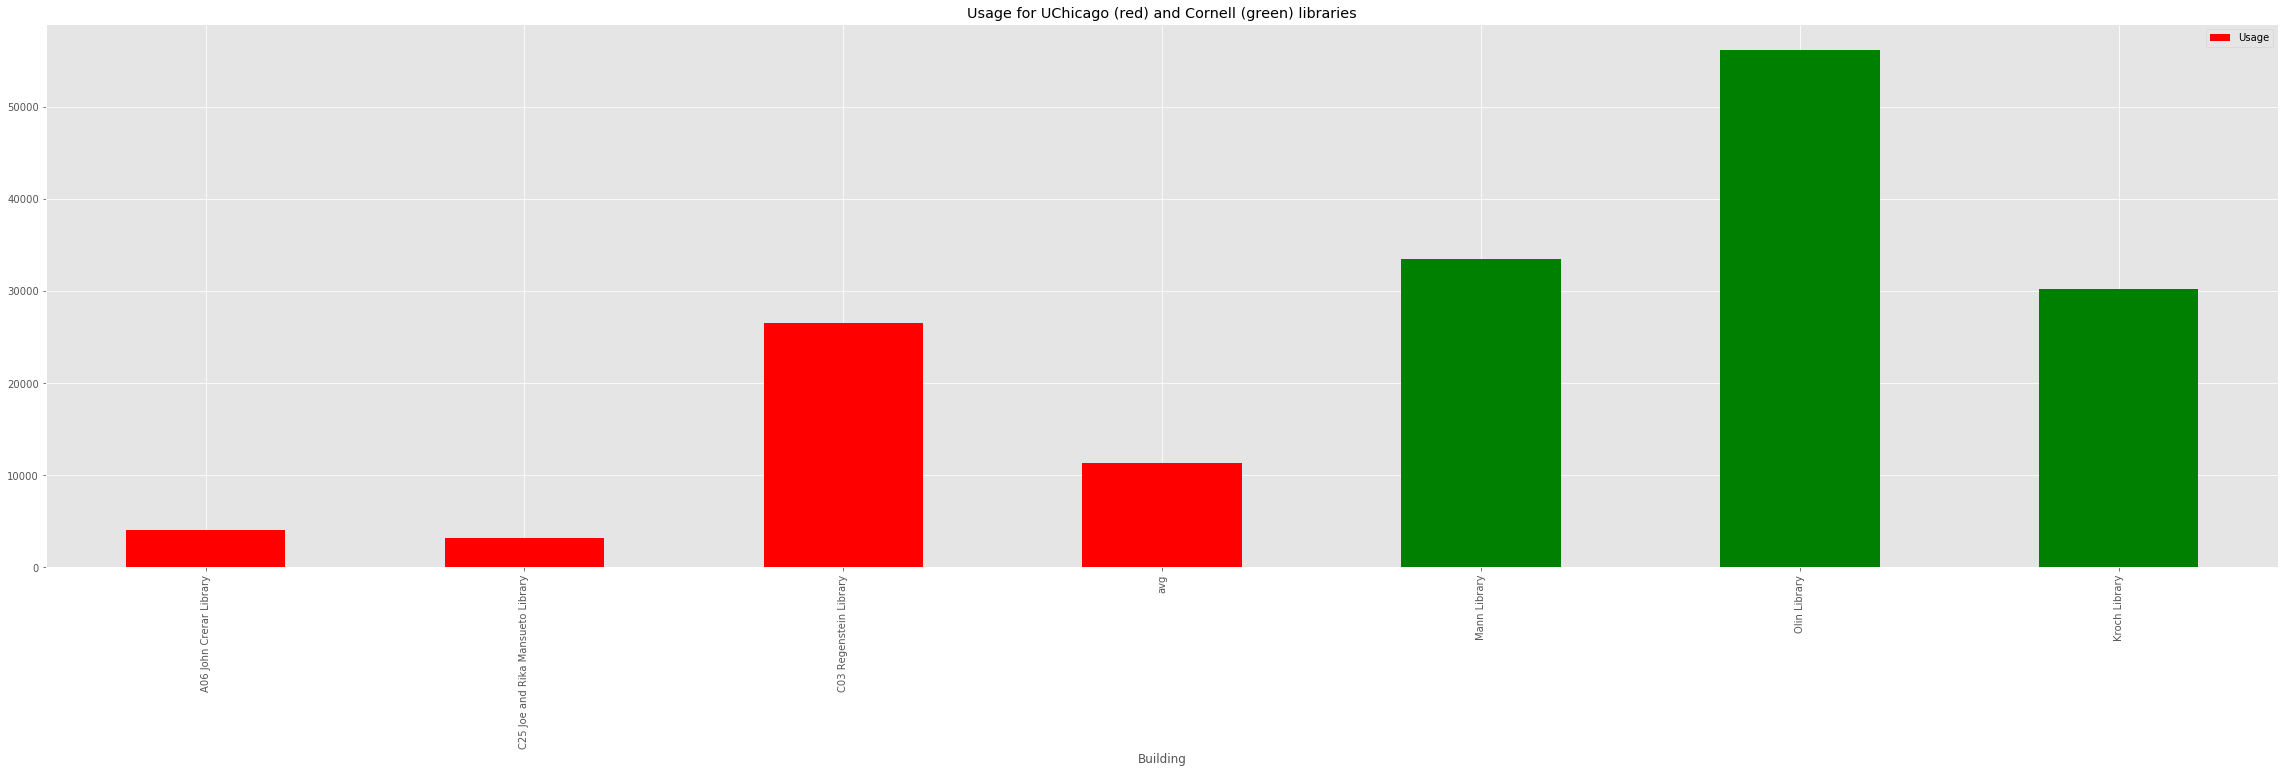

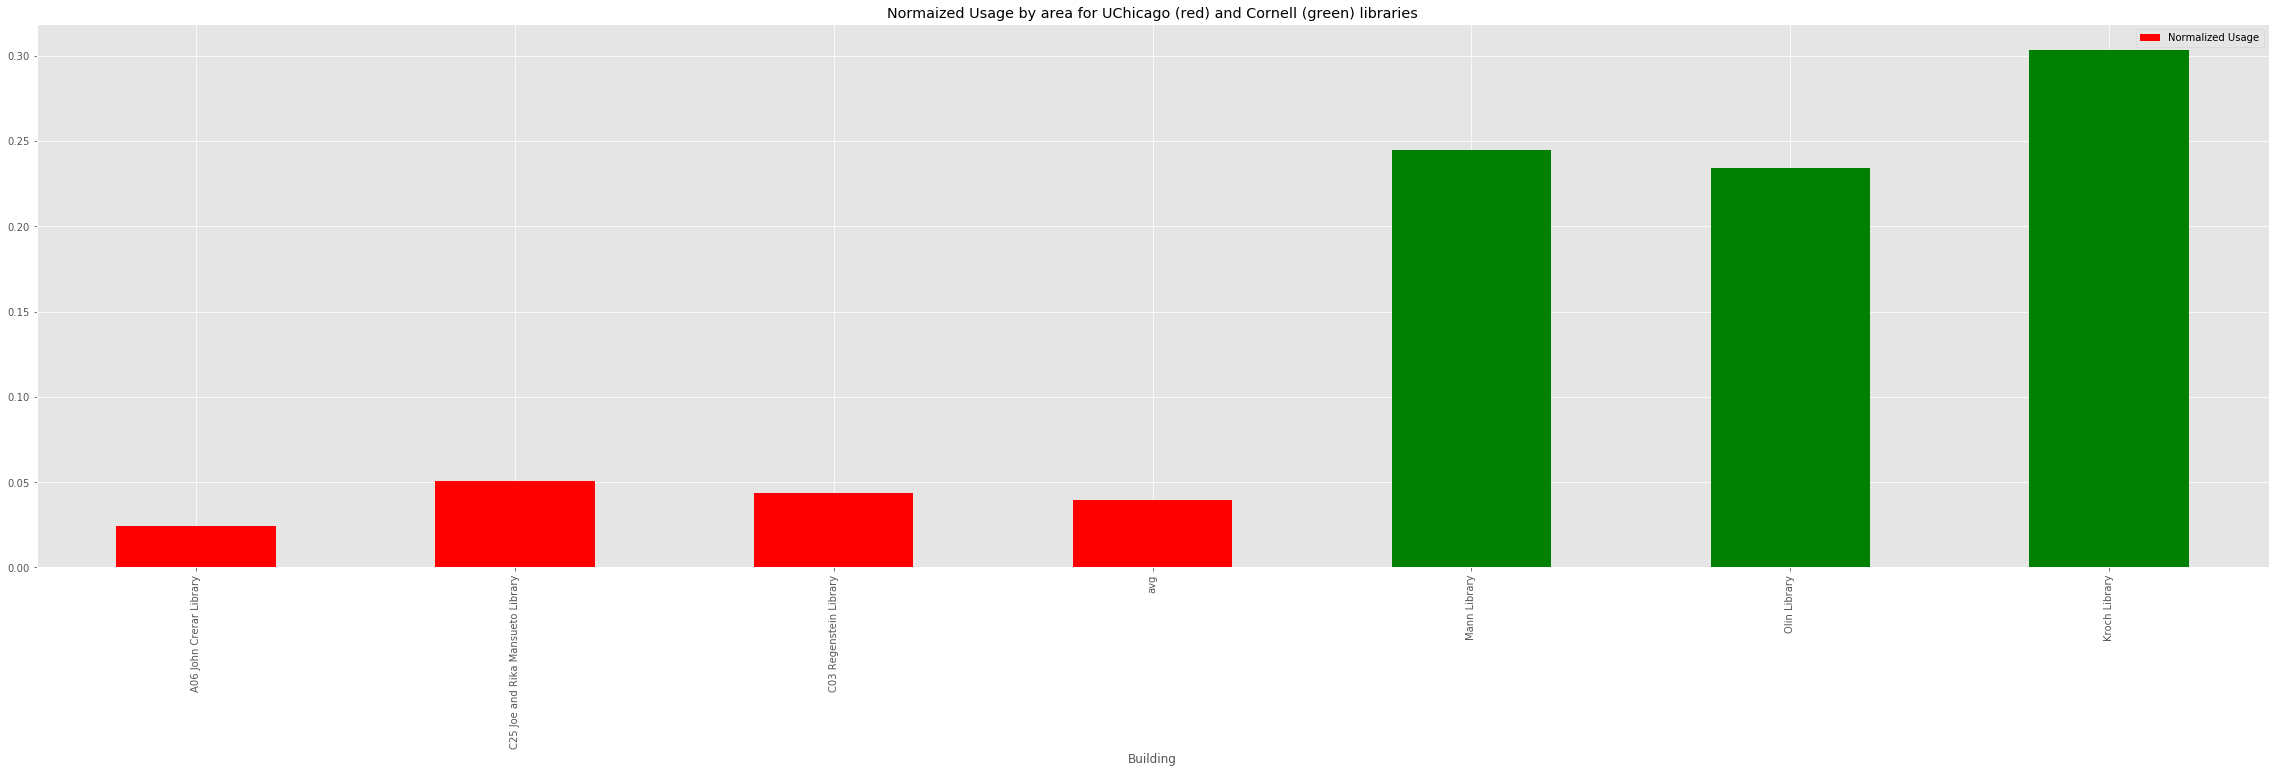

In [106]:
colors = {1:'red', 2:'green'}
combined.plot(x='Building', y='Usage', kind='bar', color=[colors[i] for i in combined['Group']], figsize=(40,10))
plt.title('Usage for UChicago (red) and Cornell (green) libraries')
combined.plot(x='Building', y='Normalized Usage', kind='bar', color=[colors[i] for i in combined['Group']], figsize=(40,10))
plt.title('Normaized Usage by area for UChicago (red) and Cornell (green) libraries')
